In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_csv("./Datasets/emotion_data_merged_9.csv")

In [3]:
# Strip emotion names
df["emotion"] = df["emotion"].str.strip()

In [4]:
df = df.dropna()

In [5]:
df = df[~df["sentence"].str.isspace()]

In [6]:
df

,sentence,emotion
0,"angstrom the curtains drew back, revealing a s...",surprise
1,"As the drapery drew back, revealing a stage ba...",surprise
2,"As the curtains Drew back, revealing a stage b...",surprise
3,"unfold the mysterious package, she discovered ...",surprise
4,"Opening the deep package, she discovered a lon...",surprise
...,...,...
959721,The fear of cyber warfare's control over perso...,fear
959722,The fear of cyber warfare's intrusion into pri...,fear
959723,The fear of cyber warfare's manipulation of pe...,fear
959724,The fear of cyber warfare's consequences on in...,fear


# Emotion distribution - full dataset


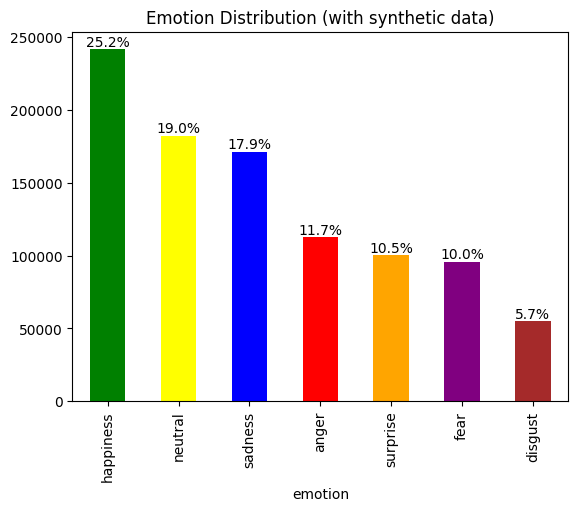

In [7]:
colors = ["green", "yellow", "blue", "red", "orange", "purple", "brown"]

ax = df.value_counts("emotion").plot(
    kind="bar", title="Emotion Distribution (with synthetic data)", color=colors
)
for p in ax.patches:
    ax.annotate(
        f"{p.get_height() / len(df) * 100:.1f}%",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 5),
        textcoords="offset points",
    )

In [8]:
df_old = pd.read_csv("./Datasets/emotion_data_merged_4.csv")
df_old = df_old.dropna()
df_old = df_old[~df_old["sentence"].str.isspace()]

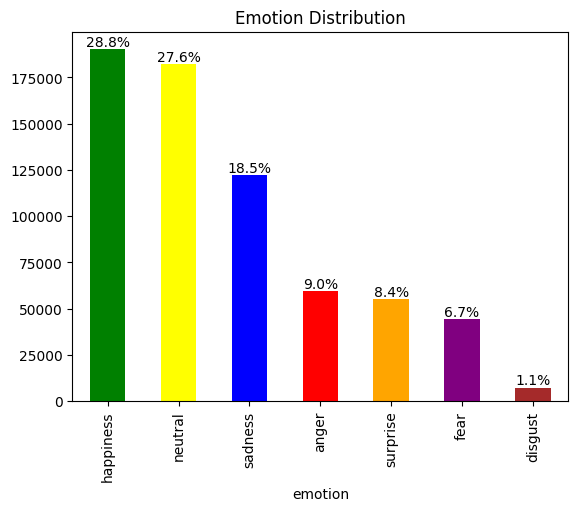

In [9]:
df_old["emotion"] = df_old["emotion"].str.strip()

ax = df_old.value_counts("emotion").plot(
    kind="bar", title="Emotion Distribution", color=colors
)
for p in ax.patches:
    ax.annotate(
        f"{p.get_height() / len(df_old) * 100:.1f}%",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 5),
        textcoords="offset points",
    )

plt.show()

# Emotion distribution per dataset


In [10]:
data_folder = "./data"
csv_files = [file for file in os.listdir(data_folder) if file.endswith(".csv")]

dataset_names = {
    "affect.csv": "Affect data",
    "affective_text.csv": "Affective Text (Test Corpus of SemEval 2007)",
    "carer.csv": "CARER dataset",
    "friends_peac_happy.csv": "Friends emotion-labeled dialogues",
    "goemotions_final.csv": "GoEmotions",
    "kaggle_wmotion_recognition_tasks.csv": "Kaggle Emotion Recognition Tasks",
    "meld.csv": "MELD",
    "twitter_processed.csv": "SMILE Twitter Emotion dataset",
}

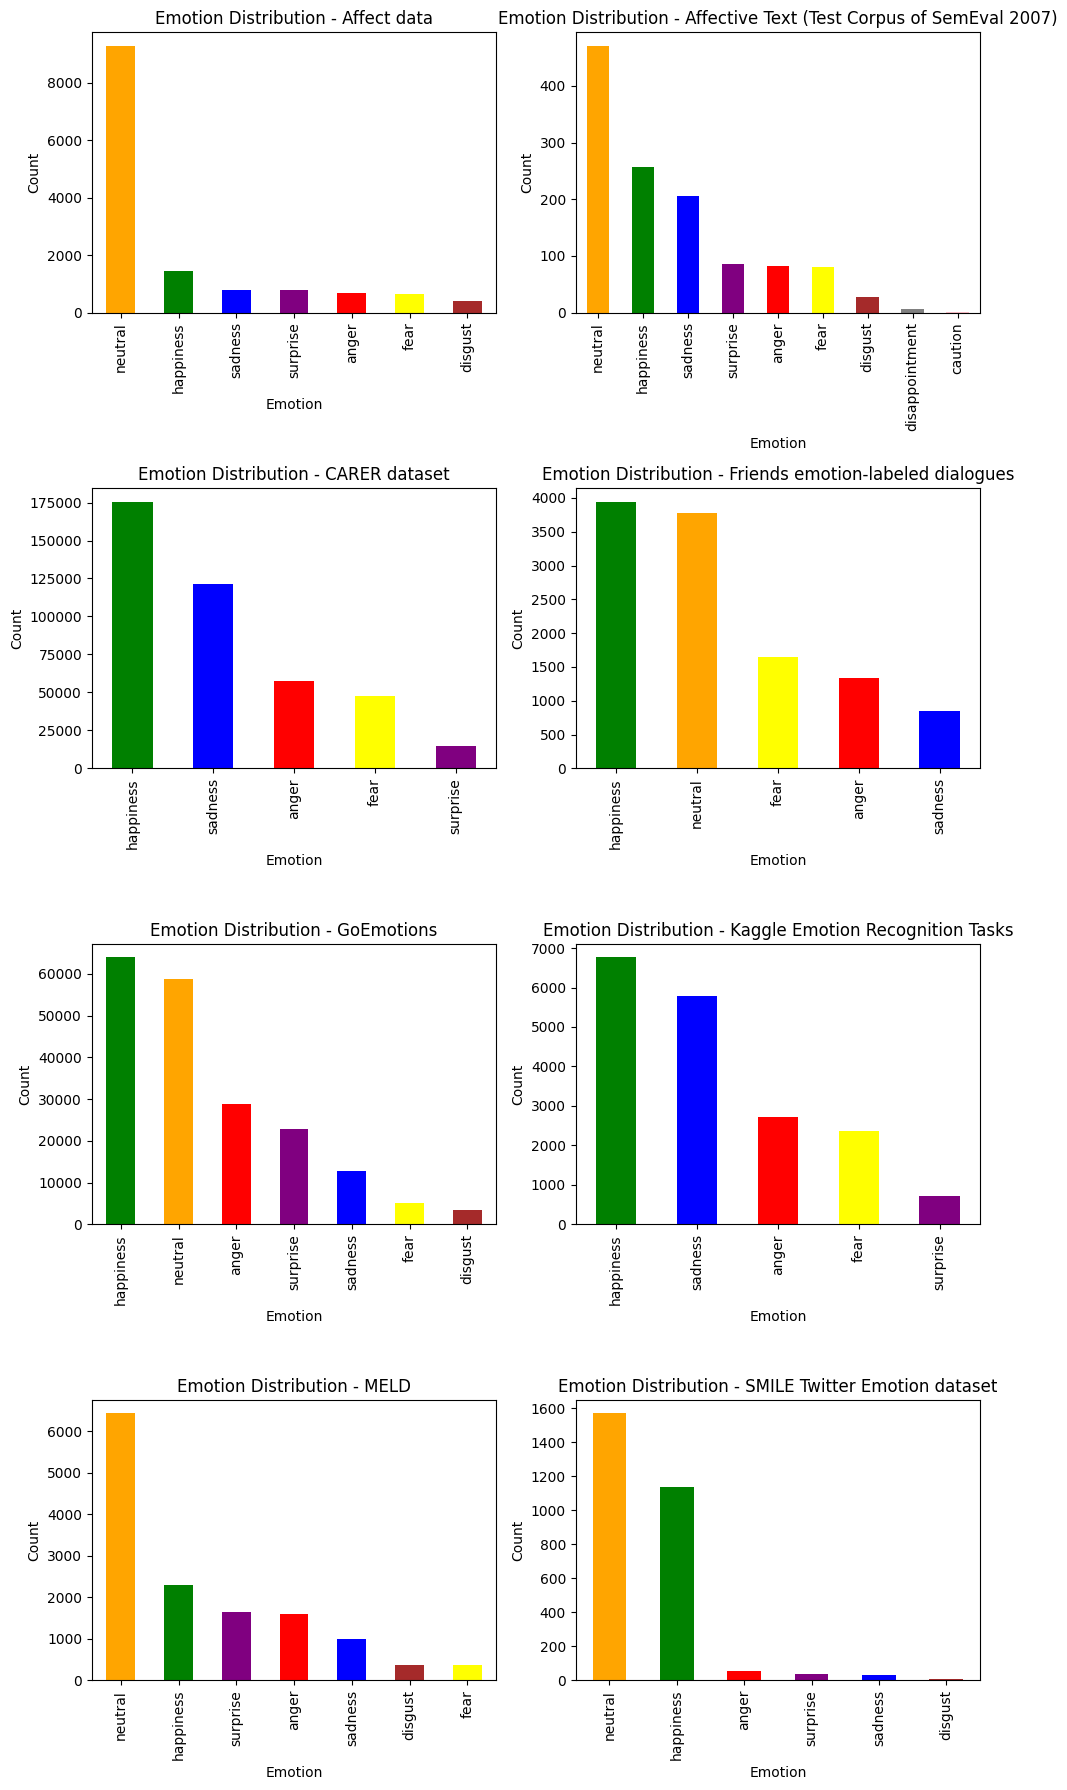

In [11]:
colors = {
    "happiness": "green",
    "neutral": "orange",
    "sadness": "blue",
    "anger": "red",
    "surprise": "purple",
    "fear": "yellow",
    "disgust": "brown",
    "disappointment": "gray",
    "caution": "pink",
}

# Create a grid of subplots with 2 columns
fig, axs = plt.subplots(len(csv_files) // 2 + len(csv_files) % 2, 2, figsize=(10, 18))

# Iterate over csv_files and plot each chart in a separate subplot
for i, file in enumerate(csv_files):
    data = pd.read_csv(os.path.join(data_folder, file))
    emotion_counts = data["emotion"].value_counts()

    # Calculate the row and column index for the subplot
    row = i // 2
    col = i % 2

    # Plot the chart in the corresponding subplot
    ax = axs[row, col]
    emotion_counts.plot(
        kind="bar", ax=ax, color=[colors[emotion] for emotion in emotion_counts.index]
    )
    ax.set_title(f"Emotion Distribution - {dataset_names[file]}")
    ax.set_xlabel("Emotion")
    ax.set_ylabel("Count")

# Adjust the layout and spacing of subplots
plt.tight_layout()

# Show the figure
plt.show()

In [12]:
df_no_neutral = df[df["emotion"] != "neutral"]

In [13]:
df["emotion"].unique()

array(['surprise', 'sadness', 'anger', 'disgust', 'happiness', 'fear',
       'neutral'], dtype=object)

In [14]:
df_no_neutral["emotion"].unique()

array(['surprise', 'sadness', 'anger', 'disgust', 'happiness', 'fear'],
      dtype=object)

# Data bias (gender, region, names)


In [15]:
def plot_word_counts(word):
    # Check if the word exists in the dataframe
    if not df_no_neutral["sentence"].str.contains(word, case=False).any():
        print(f"The word '{word}' does not exist in the dataframe.")
        return

    # Count the occurrences of the word in each class
    word_counts = df_no_neutral[
        df_no_neutral["sentence"].str.contains(word, case=False)
    ]["emotion"].value_counts()

    # print(word_counts)

    # Calculate the total number of sentences per emotion
    total_counts = df_no_neutral["emotion"].value_counts()

    # Calculate the percentage of appearances
    percentages = word_counts / total_counts * 100

    print(percentages)

    ax = percentages.plot(
        kind="bar", color=[colors[emotion] for emotion in percentages.index]
    )
    for p in ax.patches:
        ax.annotate(
            f"{p.get_height():.2f}%",
            (p.get_x() + p.get_width() / 2, p.get_height()),
            ha="center",
            va="center",
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.title(f"'{word}' appearances Percentage by Emotion")
    plt.xlabel("Emotion")
    plt.ylabel("Percentage")
    plt.show()

emotion
anger        0.037313
disgust      0.034656
fear         0.052171
happiness    0.038491
sadness      0.025089
surprise     0.011972
Name: count, dtype: float64


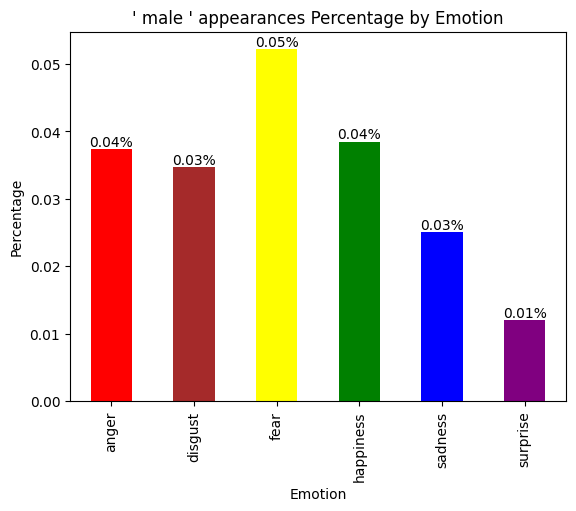

In [27]:
plot_word_counts(" male ")

emotion
anger        0.039090
disgust      0.014592
fear         0.037563
happiness    0.059599
sadness      0.042010
surprise     0.011972
Name: count, dtype: float64


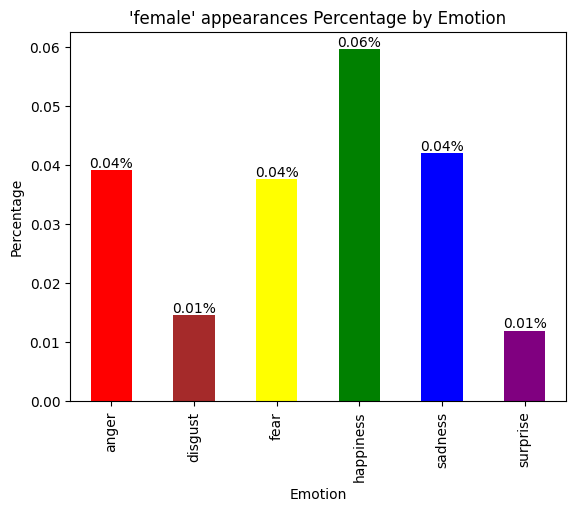

In [28]:
plot_word_counts("female")

emotion
anger        0.361582
disgust      0.187870
fear         0.115820
happiness    0.134097
sadness      0.103858
surprise     0.121713
Name: count, dtype: float64


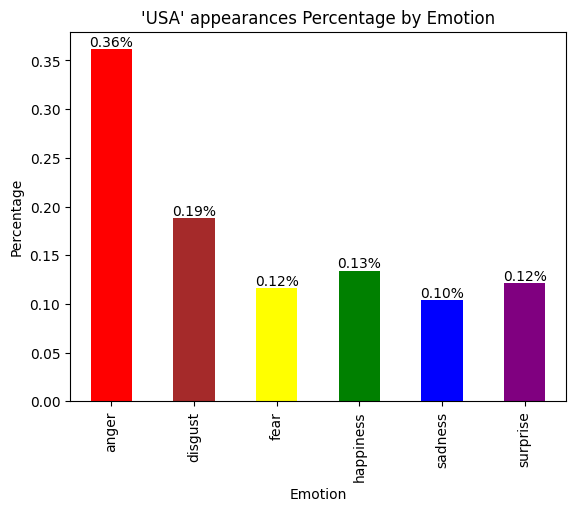

In [34]:
plot_word_counts("USA")

emotion
anger        0.031094
disgust      0.007296
fear         0.016695
happiness    0.045113
sadness      0.034425
surprise     0.008979
Name: count, dtype: float64


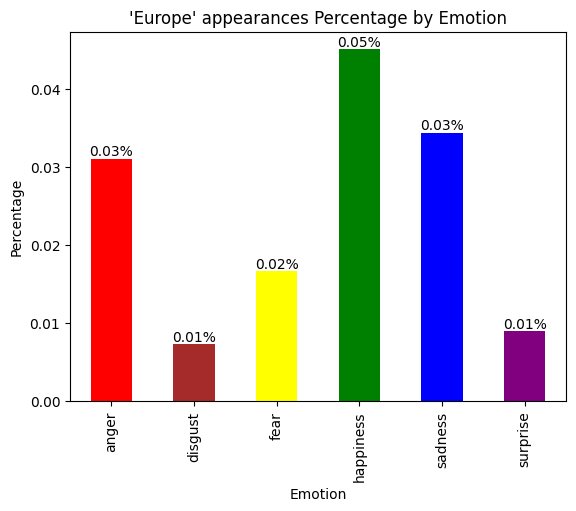

In [47]:
plot_word_counts("Europe")

emotion
anger        0.021322
disgust      0.158687
fear         0.008347
happiness    0.032283
sadness      0.022755
surprise     0.018955
Name: count, dtype: float64


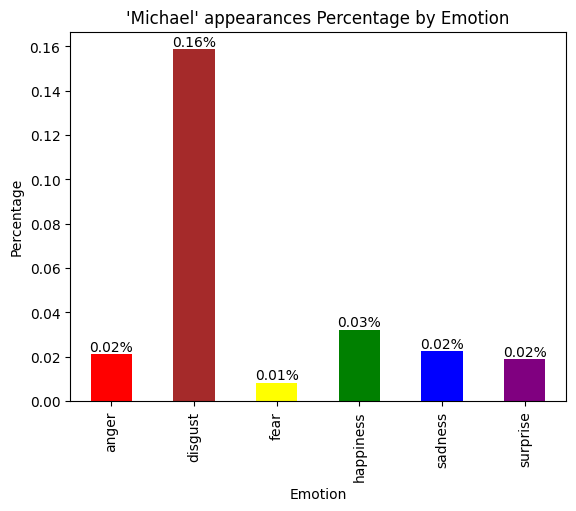

In [36]:
plot_word_counts("Michael")

emotion
anger        0.007107
disgust      0.010944
fear         0.008347
happiness    0.008278
sadness      0.038509
surprise     0.121713
Name: count, dtype: float64


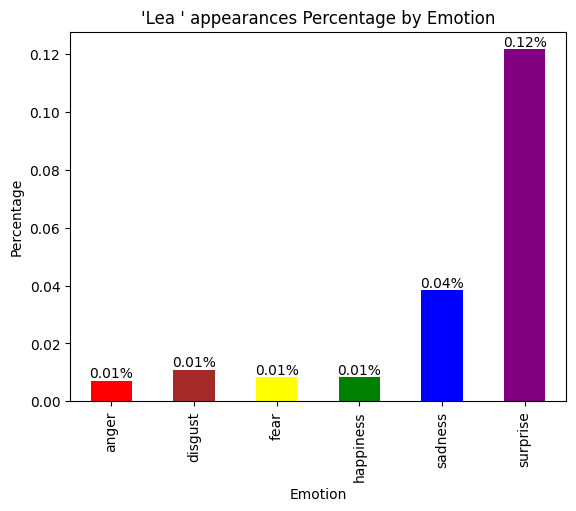

In [39]:
plot_word_counts("Lea ")

emotion
anger        0.001777
disgust           NaN
fear         0.002087
happiness    0.008691
sadness      0.007585
surprise          NaN
Name: count, dtype: float64


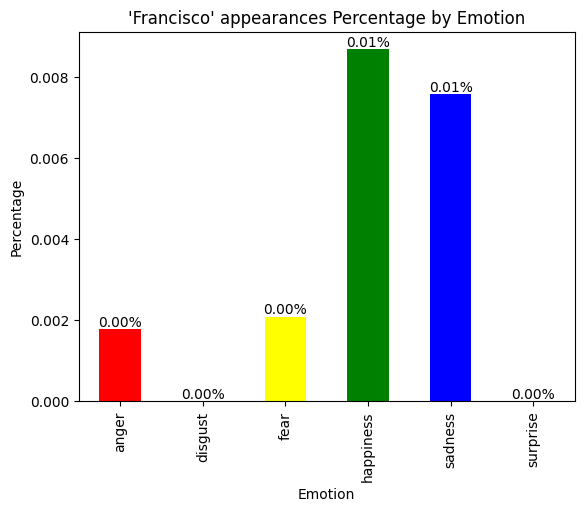

In [42]:
plot_word_counts("Francisco")

emotion
anger        0.011549
disgust      0.005472
fear         0.014608
happiness    0.024005
sadness      0.030341
surprise     0.000998
Name: count, dtype: float64


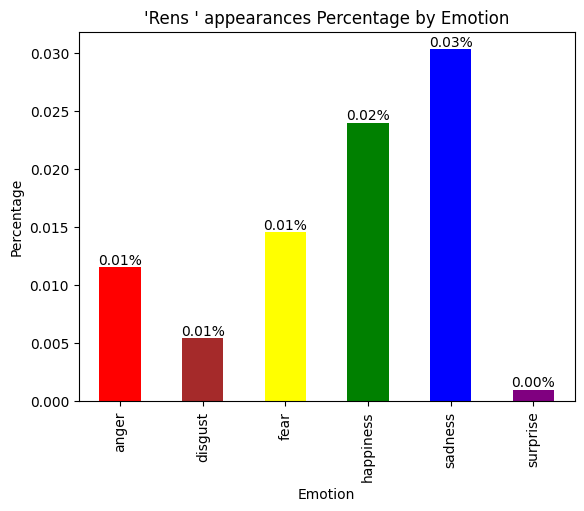

In [45]:
plot_word_counts("Rens ")

# Most common sentence endings : ["\.", "!", "\?", "\.\.\.", "!!", "\?\?", "!\?", "\?!"]


- Check how sentences end on average
- Average sentence length, min and max


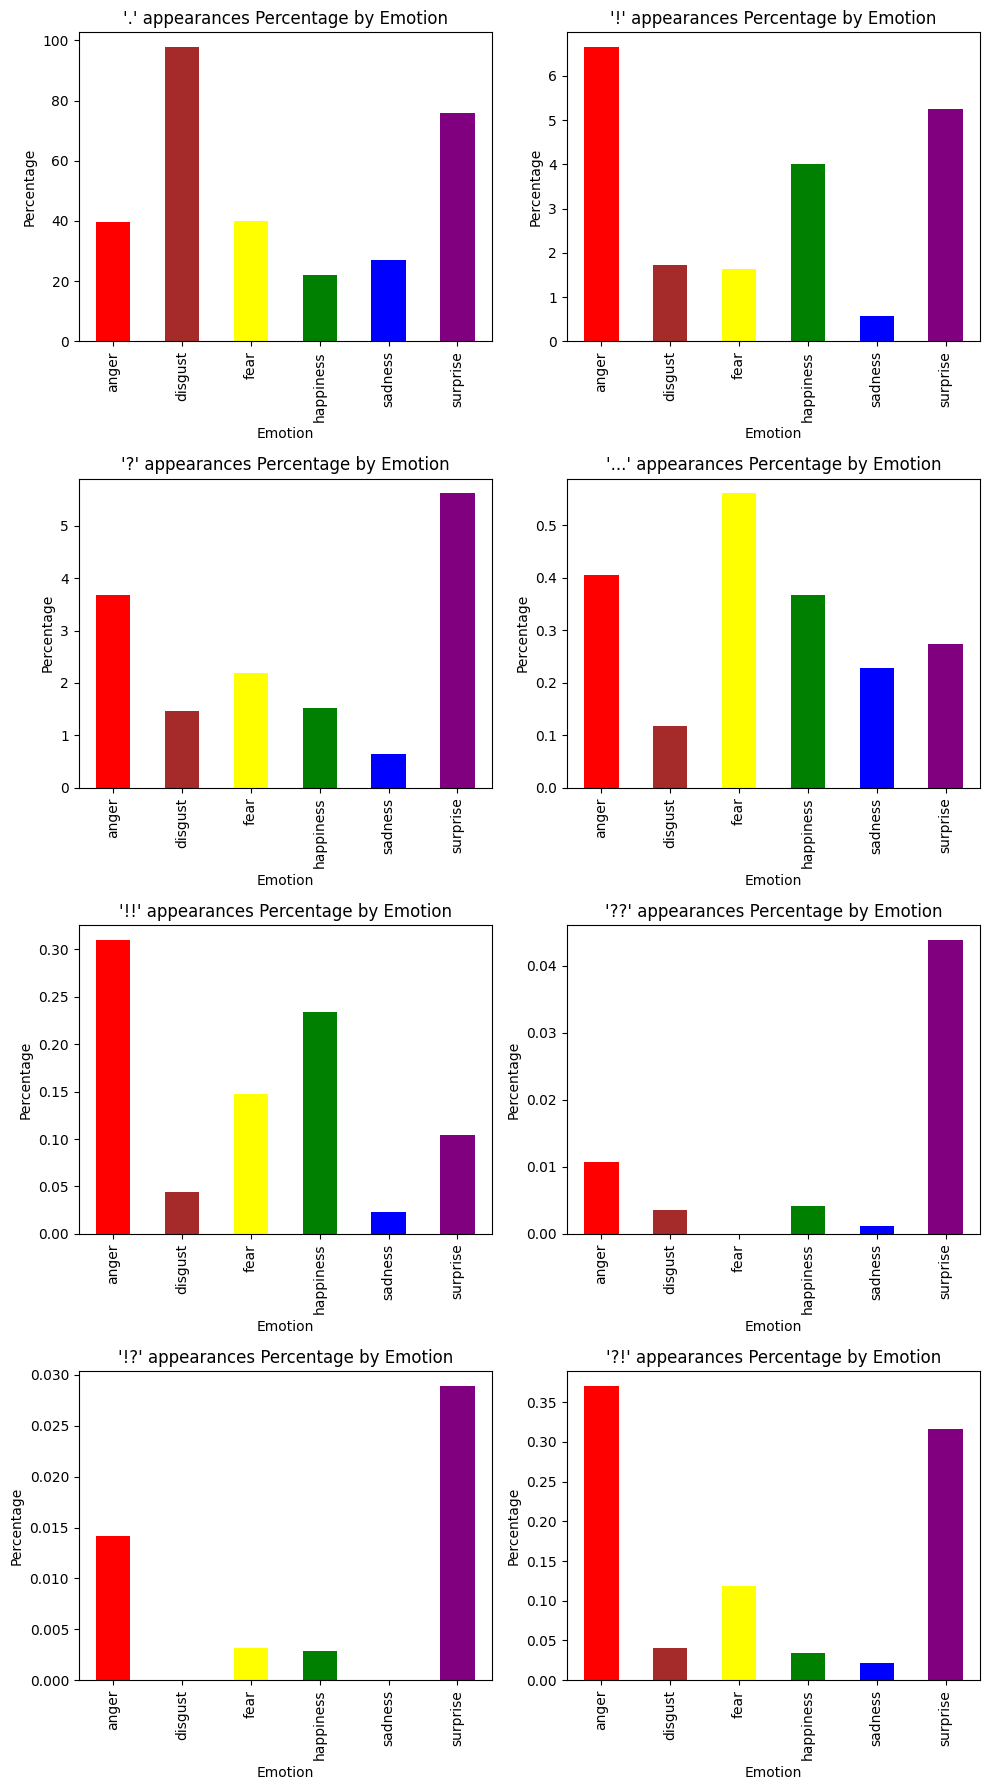

In [16]:
# Define the sentence endings to consider
sentence_endings = ["\.", "!", "\?", "\.\.\.", "!!", "\?\?", "!\?", "\?!"]

# Create a grid of subplots with 2 columns
fig, axs = plt.subplots(
    len(sentence_endings) // 2 + len(sentence_endings) % 2, 2, figsize=(10, 18)
)

# Iterate over sentence_endings and plot each chart in a separate subplot
for i, ending in enumerate(sentence_endings):
    # Check if the ending exists in the dataframe
    if not df_no_neutral["sentence"].str.contains(ending, case=False).any():
        print(f"The ending '{ending}' does not exist in the dataframe.")
        continue

    # Count the occurrences of the ending in each class
    ending_counts = df_no_neutral[
        df_no_neutral["sentence"].str.contains(ending, case=False)
    ]["emotion"].value_counts()

    # Calculate the total number of sentences per emotion
    total_counts = df_no_neutral["emotion"].value_counts()

    # Calculate the percentage of appearances
    percentages = ending_counts / total_counts * 100

    # Calculate the row and column index for the subplot
    row = i // 2
    col = i % 2

    ending_for_title = ending.replace("\\", "")

    # Plot the chart in the corresponding subplot
    ax = axs[row, col]
    percentages.plot(
        kind="bar", ax=ax, color=[colors[emotion] for emotion in percentages.index]
    )
    ax.set_title(f"'{ending_for_title}' appearances Percentage by Emotion")
    ax.set_xlabel("Emotion")
    ax.set_ylabel("Percentage")

# Adjust the layout and spacing of subplots
plt.tight_layout()

# Show the figure
plt.show()

# Most common words per emotion


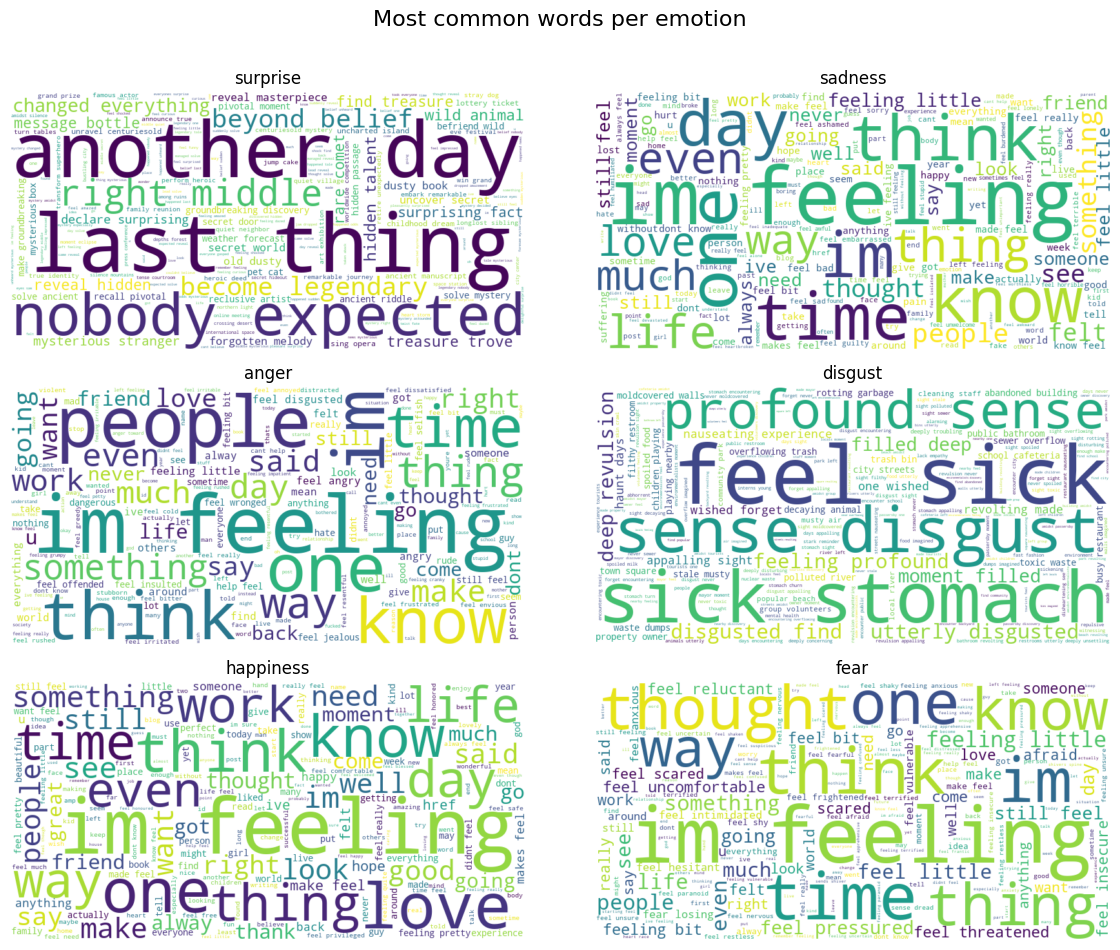

In [17]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
import string
import math

# Define stopwords and punctuation
stopwords = set(stopwords.words("english"))
punctuation = set(string.punctuation)


# Function to preprocess text
def preprocess_text(text):
    # Remove punctuation
    text = "".join([c for c in text if c not in punctuation])
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    text = " ".join([word for word in text.split() if word not in stopwords])
    return text


# Function to create a subplot for wordcloud
def create_wordcloud_subplot(ax, text, title):
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(
        text
    )
    ax.imshow(wordcloud, interpolation="bilinear")
    ax.axis("off")
    ax.set_title(title)


# Determine the number of unique emotions and create subplot dimensions
unique_emotions = df[df["emotion"] != "neutral"]["emotion"].unique()
n_emotions = len(unique_emotions)
n_cols = 2  # You can adjust this to change the layout
n_rows = math.ceil(n_emotions / n_cols)

# Create a figure for the subplots
fig = plt.figure(figsize=(n_cols * 6, n_rows * 3))

for i, emotion in enumerate(unique_emotions, start=1):
    # Filter sentences for the current emotion
    sentences = df[df["emotion"] == emotion]["sentence"]
    # Preprocess text
    processed_text = " ".join([preprocess_text(sentence) for sentence in sentences])

    # Create subplot for each emotion
    ax = plt.subplot(n_rows, n_cols, i)
    create_wordcloud_subplot(ax, processed_text, emotion)

plt.tight_layout()
fig.suptitle("Most common words per emotion", fontsize=16, y=1.05)
plt.show()

# Average, Min and Max sentence lenghts


In [18]:
# Calculate sentence lengths
df["sentence_length"] = df["sentence"].apply(lambda x: len(x.split()))

# Calculate average, minimum, and maximum sentence lengths
average_length = df["sentence_length"].mean()
minimum_length = df["sentence_length"].min()
maximum_length = df["sentence_length"].max()

# Calculate average, minimum, and maximum sentence lengths per emotion type
emotion_lengths = df.groupby("emotion")["sentence_length"].agg(["mean", "min", "max"])

In [19]:
print(f"Average sentence length: {average_length:.2f}")
print(f"Minimum sentence length: {minimum_length}")
print(f"Maximum sentence length: {maximum_length}")
print("\nAverage, min, and max sentence lengths per emotion:")
print(emotion_lengths)

Average sentence length: 15.83
Minimum sentence length: 1
Maximum sentence length: 784

Average, min, and max sentence lengths per emotion:
                mean  min  max
emotion                       
anger      15.766500    1  261
disgust    14.505098    1  234
fear       16.703437    1  160
happiness  18.030515    1  258
neutral    11.472055    1  784
sadness    17.236195    1  406
surprise   16.054940    1  237


In [20]:
df[df["sentence_length"] > 500]

,sentence,emotion,sentence_length
172397,I am the daughter of a rich count.\n52:52\tN:N...,neutral,524
176943,"Now the boy is asleep, I will tell you all.\n9...",neutral,784
185306,"That winter passed away, and another winter an...",neutral,549
185326,"Late in the autumn, when the days were short, ...",neutral,526
